In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
os=pd.read_csv("osteox.csv")

In [3]:
os.head(10)

,Age,Height (cm),Weight (kg),Gender,Symptoms,Menopause,Food Intake,Vitamin D3 (IU/day),Calcium (mg/day),Blood Count (Hemoglobin g/dL),Other Information,Flaccidity Quotient,Muscle Strength (kg),Osteophyte Count,Bone Porosity (%),Space Reduction (mm)
0,65,165.0,70.0,Female,"Joint pain, stiffness",Yes,"Balanced diet, dairy, vegetables",800.0,1000.0,13.5,History of hypertension,3.0,22.0,3.0,40.0,1.8
1,58,172.0,85.0,Male,"Swelling, decreased motion",NaN,"High protein, low carb, supplements",600.0,900.0,14.8,Type 2 diabetes,4.0,25.0,4.0,35.0,2.0
2,45,165.0,70.0,Female,"Joint stiffness, swelling",No,"Vegetarian, fruits, nuts",800.0,1000.0,12.8,None,2.0,20.0,2.0,38.0,1.7
3,70,160.0,68.0,Female,"Joint pain, swelling",Yes,"Balanced diet, fish, green leafy veg.",700.0,1200.0,12.5,Osteoporosis,4.0,23.0,4.0,42.0,2.2
4,62,175.0,90.0,Male,Pain during movement,NaN,"High fiber, low fat, red meat",900.0,800.0,14.0,Chronic kidney disease,3.0,26.0,5.0,37.0,1.9
5,55,168.0,72.0,Female,"Stiffness, decreased motion",Yes,"Low carb, fruits, dairy",500.0,1100.0,13.0,Hypothyroidism,3.0,24.0,3.0,36.0,1.8
6,63,160.0,75.0,Male,"Joint pain, tenderness",NaN,"High protein, low fat, nuts",700.0,950.0,14.2,High cholesterol,4.0,25.0,4.0,35.0,1.7
7,59,170.0,78.0,Female,"Swelling, warmth",Yes,"Balanced diet, cereals, dairy",800.0,1000.0,13.7,Anemia,3.0,23.0,3.0,39.0,1.8
8,50,169.0,80.0,Male,"Pain, stiffness",NaN,"High fiber, dairy, vegetables",900.0,950.0,14.0,Hypertension,4.0,24.0,4.0,35.0,2.0
9,47,162.0,68.0,Female,"Pain, swelling",No,"Balanced diet, fruits, nuts",800.0,1000.0,12.5,Hypothyroidism,3.0,22.0,3.0,38.0,1.7


In [5]:
os.index

RangeIndex(start=0, stop=79, step=1)

In [7]:
os.shape

(79, 16)

In [6]:
os.size

1264

In [378]:
os.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            79 non-null     object 
 1   Height (cm)                    77 non-null     float64
 2   Weight (kg)                    77 non-null     float64
 3   Gender                         77 non-null     object 
 4   Symptoms                       77 non-null     object 
 5   Menopause                      39 non-null     object 
 6   Food Intake                    77 non-null     object 
 7   Vitamin D3 (IU/day)            77 non-null     float64
 8   Calcium (mg/day)               77 non-null     float64
 9   Blood Count (Hemoglobin g/dL)  77 non-null     float64
 10  Other Information              77 non-null     object 
 11  Flaccidity Quotient            77 non-null     float64
 12  Muscle Strength (kg)           76 non-null     float

In [379]:
unique_values = os['Symptoms'].unique()

In [380]:
os['Gender'] = os['Gender'].astype('category')  # Convert Gender to category if it's categorical
os['Age'] = pd.to_numeric(os['Age'], errors='coerce')

# Drop rows with NaN values in the Age column (or handle them as needed)
os = os.dropna(subset=['Age'])

# Convert Age to int
os['Age'] = os['Age'].astype(int)

In [381]:
os.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            77 non-null     int64   
 1   Height (cm)                    77 non-null     float64 
 2   Weight (kg)                    77 non-null     float64 
 3   Gender                         77 non-null     category
 4   Symptoms                       77 non-null     object  
 5   Menopause                      39 non-null     object  
 6   Food Intake                    77 non-null     object  
 7   Vitamin D3 (IU/day)            77 non-null     float64 
 8   Calcium (mg/day)               77 non-null     float64 
 9   Blood Count (Hemoglobin g/dL)  77 non-null     float64 
 10  Other Information              77 non-null     object  
 11  Flaccidity Quotient            77 non-null     float64 
 12  Muscle Strength (kg)           76 non-

In [382]:
os.shape

(77, 16)

<Axes: >

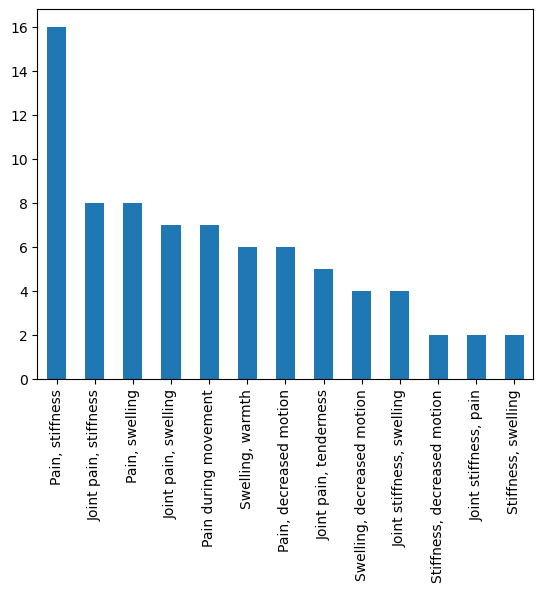

In [383]:
os["Symptoms"].value_counts().plot(kind="bar")

In [384]:
os['Gender'] = os['Gender'].str.lower()
os['Symptoms'] = os['Symptoms'].str.lower()
os['Menopause'] = os['Menopause'].str.lower()
os['Food Intake'] = os['Food Intake'].str.lower()
os['Other Information'] = os['Other Information'].str.lower()

# Expand the symptoms column
symptoms_expanded = os['Symptoms'].str.get_dummies(sep=', ')
print(symptoms_expanded)

    decreased motion  joint pain  joint stiffness  pain  pain during movement  \
0                  0           1                0     0                     0   
1                  1           0                0     0                     0   
2                  0           0                1     0                     0   
3                  0           1                0     0                     0   
4                  0           0                0     0                     1   
..               ...         ...              ...   ...                   ...   
72                 0           1                0     0                     0   
73                 0           1                0     0                     0   
74                 1           0                0     0                     0   
75                 0           1                0     0                     0   
76                 0           1                0     0                     0   

    stiffness  swelling  te

In [385]:
symptoms_expanded.columns = symptoms_expanded.columns.str.strip()

# Print available columns in the expanded symptoms DataFrame
print("Columns in symptoms_expanded:", symptoms_expanded.columns)

# Merge columns: "joint stiffness" with "stiffness", and "joint pain" with "pain"
if 'joint stiffness' in symptoms_expanded.columns and 'stiffness' in symptoms_expanded.columns:
    symptoms_expanded['joint stiffness'] = symptoms_expanded[['joint stiffness', 'stiffness']].max(axis=1)
    symptoms_expanded.drop(columns=['stiffness'], inplace=True)

if 'joint pain' in symptoms_expanded.columns and 'pain' in symptoms_expanded.columns:
    symptoms_expanded['joint pain'] = symptoms_expanded[['joint pain', 'pain']].max(axis=1)
    symptoms_expanded.drop(columns=['pain'], inplace=True)

# Concatenate the original data with the expanded symptoms
os = pd.concat([os, symptoms_expanded], axis=1)
print(os)

# Drop the original symptoms column
os.drop('Symptoms', axis=1, inplace=True)

# Save the processed dataframe
os.to_csv('data3.csv', index=False)

# Display the first few rows of the processed dataframe
print(os.head())


Columns in symptoms_expanded: Index(['decreased motion', 'joint pain', 'joint stiffness', 'pain',
       'pain during movement', 'stiffness', 'swelling', 'tenderness',
       'warmth'],
      dtype='object')
    Age  Height (cm)  Weight (kg)  Gender                    Symptoms  \
0    65        165.0         70.0  female       joint pain, stiffness   
1    58        172.0         85.0    male  swelling, decreased motion   
2    45        165.0         70.0  female   joint stiffness, swelling   
3    70        160.0         68.0  female        joint pain, swelling   
4    62        175.0         90.0    male        pain during movement   
..  ...          ...          ...     ...                         ...   
72   56        165.0         85.0    male        joint pain, swelling   
73   51        162.0         70.0  female       joint pain, stiffness   
74   59        172.0         88.0    male  swelling, decreased motion   
75   58        168.0         72.0  female       joint pain, st

In [386]:
os.head(20)

,Age,Height (cm),Weight (kg),Gender,Menopause,Food Intake,Vitamin D3 (IU/day),Calcium (mg/day),Blood Count (Hemoglobin g/dL),Other Information,...,Osteophyte Count,Bone Porosity (%),Space Reduction (mm),decreased motion,joint pain,joint stiffness,pain during movement,swelling,tenderness,warmth
0,65,165.0,70.0,female,yes,"balanced diet, dairy, vegetables",800.0,1000.0,13.5,history of hypertension,...,3.0,40.0,1.8,0,1,1,0,0,0,0
1,58,172.0,85.0,male,NaN,"high protein, low carb, supplements",600.0,900.0,14.8,type 2 diabetes,...,4.0,35.0,2.0,1,0,0,0,1,0,0
2,45,165.0,70.0,female,no,"vegetarian, fruits, nuts",800.0,1000.0,12.8,none,...,2.0,38.0,1.7,0,0,1,0,1,0,0
3,70,160.0,68.0,female,yes,"balanced diet, fish, green leafy veg.",700.0,1200.0,12.5,osteoporosis,...,4.0,42.0,2.2,0,1,0,0,1,0,0
4,62,175.0,90.0,male,NaN,"high fiber, low fat, red meat",900.0,800.0,14.0,chronic kidney disease,...,5.0,37.0,1.9,0,0,0,1,0,0,0
5,55,168.0,72.0,female,yes,"low carb, fruits, dairy",500.0,1100.0,13.0,hypothyroidism,...,3.0,36.0,1.8,1,0,1,0,0,0,0
6,63,160.0,75.0,male,NaN,"high protein, low fat, nuts",700.0,950.0,14.2,high cholesterol,...,4.0,35.0,1.7,0,1,0,0,0,1,0
7,59,170.0,78.0,female,yes,"balanced diet, cereals, dairy",800.0,1000.0,13.7,anemia,...,3.0,39.0,1.8,0,0,0,0,1,0,1
8,50,169.0,80.0,male,NaN,"high fiber, dairy, vegetables",900.0,950.0,14.0,hypertension,...,4.0,35.0,2.0,0,1,1,0,0,0,0
9,47,162.0,68.0,female,no,"balanced diet, fruits, nuts",800.0,1000.0,12.5,hypothyroidism,...,3.0,38.0,1.7,0,1,0,0,1,0,0


<Axes: >

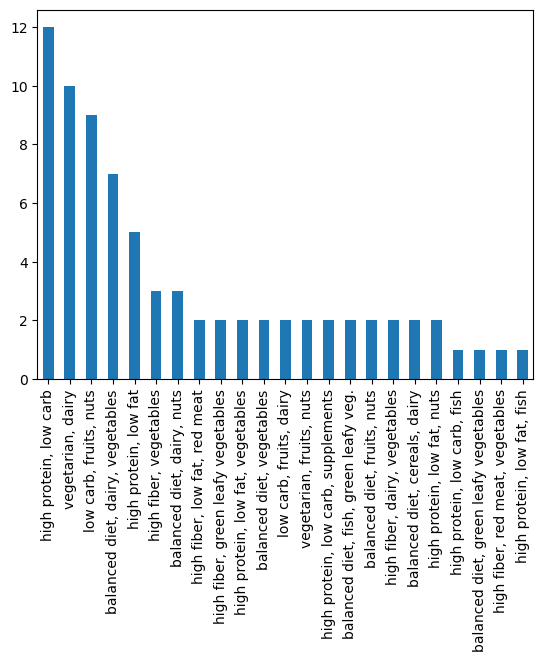

In [387]:

os["Food Intake"].value_counts().plot(kind="bar")

In [388]:
os["Food Intake"].value_counts()

high protein, low carb                   12
vegetarian, dairy                        10
low carb, fruits, nuts                    9
balanced diet, dairy, vegetables          7
high protein, low fat                     5
high fiber, vegetables                    3
balanced diet, dairy, nuts                3
high fiber, low fat, red meat             2
high fiber, green leafy vegetables        2
high protein, low fat, vegetables         2
balanced diet, vegetables                 2
low carb, fruits, dairy                   2
vegetarian, fruits, nuts                  2
high protein, low carb, supplements       2
balanced diet, fish, green leafy veg.     2
balanced diet, fruits, nuts               2
high fiber, dairy, vegetables             2
balanced diet, cereals, dairy             2
high protein, low fat, nuts               2
high protein, low carb, fish              1
balanced diet, green leafy vegetables     1
high fiber, red meat, vegetables          1
high protein, low fat, fish     

In [389]:
food_intake_expanded = os['Food Intake'].str.get_dummies(sep=', ')
print(food_intake_expanded)

    balanced diet  cereals  dairy  fish  fruits  green leafy veg.  \
0               1        0      1     0       0                 0   
1               0        0      0     0       0                 0   
2               0        0      0     0       1                 0   
3               1        0      0     1       0                 1   
4               0        0      0     0       0                 0   
..            ...      ...    ...   ...     ...               ...   
72              0        0      0     0       0                 0   
73              0        0      1     0       0                 0   
74              0        0      0     0       0                 0   
75              0        0      0     0       1                 0   
76              0        0      0     0       0                 0   

    green leafy vegetables  high fiber  high protein  low carb  low fat  nuts  \
0                        0           0             0         0        0     0   
1        

In [390]:
food_intake_expanded.columns = food_intake_expanded.columns.str.strip()

# Print available columns in the expanded symptoms DataFrame
print("Columns in food_expanded:", food_intake_expanded.columns)

protein_sources = ['dairy', 'nuts', 'red meat', 'fish', 'supplements']
for source in protein_sources:
    if source in food_intake_expanded.columns:
        food_intake_expanded['protein'] = food_intake_expanded.get('protein', 0) | food_intake_expanded[source]

        
# Drop individual protein source columns
food_intake_expanded.drop(columns=protein_sources, inplace=True)

# Concatenate the original data with the expanded food intake
os = pd.concat([os, food_intake_expanded], axis=1)

# Drop the original food intake column
#os.drop('Food Intake', axis=1, inplace=True)

# Save the processed dataframe
os.to_csv('data4.csv', index=False)

# Display the first few rows of the processed dataframe
print(os.head())


Columns in food_expanded: Index(['balanced diet', 'cereals', 'dairy', 'fish', 'fruits',
       'green leafy veg.', 'green leafy vegetables', 'high fiber',
       'high protein', 'low carb', 'low fat', 'nuts', 'red meat',
       'supplements', 'vegetables', 'vegetarian'],
      dtype='object')
   Age  Height (cm)  Weight (kg)  Gender Menopause  \
0   65        165.0         70.0  female       yes   
1   58        172.0         85.0    male       NaN   
2   45        165.0         70.0  female        no   
3   70        160.0         68.0  female       yes   
4   62        175.0         90.0    male       NaN   

                             Food Intake  Vitamin D3 (IU/day)  \
0       balanced diet, dairy, vegetables                800.0   
1    high protein, low carb, supplements                600.0   
2               vegetarian, fruits, nuts                800.0   
3  balanced diet, fish, green leafy veg.                700.0   
4          high fiber, low fat, red meat                

In [391]:
os.head(20)

,Age,Height (cm),Weight (kg),Gender,Menopause,Food Intake,Vitamin D3 (IU/day),Calcium (mg/day),Blood Count (Hemoglobin g/dL),Other Information,...,fruits,green leafy veg.,green leafy vegetables,high fiber,high protein,low carb,low fat,vegetables,vegetarian,protein
0,65,165.0,70.0,female,yes,"balanced diet, dairy, vegetables",800.0,1000.0,13.5,history of hypertension,...,0,0,0,0,0,0,0,1,0,1
1,58,172.0,85.0,male,NaN,"high protein, low carb, supplements",600.0,900.0,14.8,type 2 diabetes,...,0,0,0,0,1,1,0,0,0,1
2,45,165.0,70.0,female,no,"vegetarian, fruits, nuts",800.0,1000.0,12.8,none,...,1,0,0,0,0,0,0,0,1,1
3,70,160.0,68.0,female,yes,"balanced diet, fish, green leafy veg.",700.0,1200.0,12.5,osteoporosis,...,0,1,0,0,0,0,0,0,0,1
4,62,175.0,90.0,male,NaN,"high fiber, low fat, red meat",900.0,800.0,14.0,chronic kidney disease,...,0,0,0,1,0,0,1,0,0,1
5,55,168.0,72.0,female,yes,"low carb, fruits, dairy",500.0,1100.0,13.0,hypothyroidism,...,1,0,0,0,0,1,0,0,0,1
6,63,160.0,75.0,male,NaN,"high protein, low fat, nuts",700.0,950.0,14.2,high cholesterol,...,0,0,0,0,1,0,1,0,0,1
7,59,170.0,78.0,female,yes,"balanced diet, cereals, dairy",800.0,1000.0,13.7,anemia,...,0,0,0,0,0,0,0,0,0,1
8,50,169.0,80.0,male,NaN,"high fiber, dairy, vegetables",900.0,950.0,14.0,hypertension,...,0,0,0,1,0,0,0,1,0,1
9,47,162.0,68.0,female,no,"balanced diet, fruits, nuts",800.0,1000.0,12.5,hypothyroidism,...,1,0,0,0,0,0,0,0,0,1


In [392]:
carbohydrates_sources = ['fruits','vegetables','cereals']
for source in carbohydrates_sources:
    if source in food_intake_expanded.columns:
        food_intake_expanded['carbs'] = food_intake_expanded.get('carbs', 0) | food_intake_expanded[source]

food_intake_expanded.drop(columns=carbohydrates_sources, inplace=True)
os = pd.concat([os, food_intake_expanded], axis=1)
os.to_csv('datax.csv', index=False)



In [393]:
os.head()

,Age,Height (cm),Weight (kg),Gender,Menopause,Food Intake,Vitamin D3 (IU/day),Calcium (mg/day),Blood Count (Hemoglobin g/dL),Other Information,...,balanced diet,green leafy veg.,green leafy vegetables,high fiber,high protein,low carb,low fat,vegetarian,protein,carbs
0,65,165.0,70.0,female,yes,"balanced diet, dairy, vegetables",800.0,1000.0,13.5,history of hypertension,...,1,0,0,0,0,0,0,0,1,1
1,58,172.0,85.0,male,NaN,"high protein, low carb, supplements",600.0,900.0,14.8,type 2 diabetes,...,0,0,0,0,1,1,0,0,1,0
2,45,165.0,70.0,female,no,"vegetarian, fruits, nuts",800.0,1000.0,12.8,none,...,0,0,0,0,0,0,0,1,1,1
3,70,160.0,68.0,female,yes,"balanced diet, fish, green leafy veg.",700.0,1200.0,12.5,osteoporosis,...,1,1,0,0,0,0,0,0,1,0
4,62,175.0,90.0,male,NaN,"high fiber, low fat, red meat",900.0,800.0,14.0,chronic kidney disease,...,0,0,0,1,0,0,1,0,1,0


In [394]:
fat_sources = ['low carb','low fat']
for source in fat_sources:
    if source in food_intake_expanded.columns:
        food_intake_expanded['fats'] = food_intake_expanded.get('fats', 0) | food_intake_expanded[source]

food_intake_expanded.drop(columns=fat_sources, inplace=True)
os = pd.concat([os, food_intake_expanded], axis=1)
os.to_csv('data5.csv', index=False)




In [395]:
os.head()

,Age,Height (cm),Weight (kg),Gender,Menopause,Food Intake,Vitamin D3 (IU/day),Calcium (mg/day),Blood Count (Hemoglobin g/dL),Other Information,...,carbs,balanced diet,green leafy veg.,green leafy vegetables,high fiber,high protein,vegetarian,protein,carbs,fats
0,65,165.0,70.0,female,yes,"balanced diet, dairy, vegetables",800.0,1000.0,13.5,history of hypertension,...,1,1,0,0,0,0,0,1,1,0
1,58,172.0,85.0,male,NaN,"high protein, low carb, supplements",600.0,900.0,14.8,type 2 diabetes,...,0,0,0,0,0,1,0,1,0,1
2,45,165.0,70.0,female,no,"vegetarian, fruits, nuts",800.0,1000.0,12.8,none,...,1,0,0,0,0,0,1,1,1,0
3,70,160.0,68.0,female,yes,"balanced diet, fish, green leafy veg.",700.0,1200.0,12.5,osteoporosis,...,0,1,1,0,0,0,0,1,0,0
4,62,175.0,90.0,male,NaN,"high fiber, low fat, red meat",900.0,800.0,14.0,chronic kidney disease,...,0,0,0,0,1,0,0,1,0,1


In [396]:
fiber_sources = ['high fiber','green leafy veg.','green leafy vegetables']
for source in fiber_sources:
    if source in food_intake_expanded.columns:
        food_intake_expanded['fiber'] = food_intake_expanded.get('fiber', 0) | food_intake_expanded[source]

food_intake_expanded.drop(columns=fiber_sources, inplace=True)
os = pd.concat([os, food_intake_expanded], axis=1)
os.to_csv('data6.csv', index=False)

In [397]:
os.head(20)

,Age,Height (cm),Weight (kg),Gender,Menopause,Food Intake,Vitamin D3 (IU/day),Calcium (mg/day),Blood Count (Hemoglobin g/dL),Other Information,...,protein,carbs,fats,balanced diet,high protein,vegetarian,protein,carbs,fats,fiber
0,65,165.0,70.0,female,yes,"balanced diet, dairy, vegetables",800.0,1000.0,13.5,history of hypertension,...,1,1,0,1,0,0,1,1,0,0
1,58,172.0,85.0,male,NaN,"high protein, low carb, supplements",600.0,900.0,14.8,type 2 diabetes,...,1,0,1,0,1,0,1,0,1,0
2,45,165.0,70.0,female,no,"vegetarian, fruits, nuts",800.0,1000.0,12.8,none,...,1,1,0,0,0,1,1,1,0,0
3,70,160.0,68.0,female,yes,"balanced diet, fish, green leafy veg.",700.0,1200.0,12.5,osteoporosis,...,1,0,0,1,0,0,1,0,0,1
4,62,175.0,90.0,male,NaN,"high fiber, low fat, red meat",900.0,800.0,14.0,chronic kidney disease,...,1,0,1,0,0,0,1,0,1,1
5,55,168.0,72.0,female,yes,"low carb, fruits, dairy",500.0,1100.0,13.0,hypothyroidism,...,1,1,1,0,0,0,1,1,1,0
6,63,160.0,75.0,male,NaN,"high protein, low fat, nuts",700.0,950.0,14.2,high cholesterol,...,1,0,1,0,1,0,1,0,1,0
7,59,170.0,78.0,female,yes,"balanced diet, cereals, dairy",800.0,1000.0,13.7,anemia,...,1,1,0,1,0,0,1,1,0,0
8,50,169.0,80.0,male,NaN,"high fiber, dairy, vegetables",900.0,950.0,14.0,hypertension,...,1,1,0,0,0,0,1,1,0,1
9,47,162.0,68.0,female,no,"balanced diet, fruits, nuts",800.0,1000.0,12.5,hypothyroidism,...,1,1,0,1,0,0,1,1,0,0


In [398]:
#apply same to foodintake, other info,convert float values to int for vitamin,calcium,osteophyte count,boneporosity:

In [399]:
os = os.loc[:, ~os.columns.duplicated()]

In [400]:
os.head()

,Age,Height (cm),Weight (kg),Gender,Menopause,Food Intake,Vitamin D3 (IU/day),Calcium (mg/day),Blood Count (Hemoglobin g/dL),Other Information,...,high fiber,high protein,low carb,low fat,vegetables,vegetarian,protein,carbs,fats,fiber
0,65,165.0,70.0,female,yes,"balanced diet, dairy, vegetables",800.0,1000.0,13.5,history of hypertension,...,0,0,0,0,1,0,1,1,0,0
1,58,172.0,85.0,male,NaN,"high protein, low carb, supplements",600.0,900.0,14.8,type 2 diabetes,...,0,1,1,0,0,0,1,0,1,0
2,45,165.0,70.0,female,no,"vegetarian, fruits, nuts",800.0,1000.0,12.8,none,...,0,0,0,0,0,1,1,1,0,0
3,70,160.0,68.0,female,yes,"balanced diet, fish, green leafy veg.",700.0,1200.0,12.5,osteoporosis,...,0,0,0,0,0,0,1,0,0,1
4,62,175.0,90.0,male,NaN,"high fiber, low fat, red meat",900.0,800.0,14.0,chronic kidney disease,...,1,0,0,1,0,0,1,0,1,1


In [401]:
os = os.drop(columns=['high fiber','high protein','low carb','low fat','vegetables','vegetarian','fruits','green leafy vegetables','green leafy veg.','cereals'])

In [402]:
os.head()

,Age,Height (cm),Weight (kg),Gender,Menopause,Food Intake,Vitamin D3 (IU/day),Calcium (mg/day),Blood Count (Hemoglobin g/dL),Other Information,...,joint stiffness,pain during movement,swelling,tenderness,warmth,balanced diet,protein,carbs,fats,fiber
0,65,165.0,70.0,female,yes,"balanced diet, dairy, vegetables",800.0,1000.0,13.5,history of hypertension,...,1,0,0,0,0,1,1,1,0,0
1,58,172.0,85.0,male,NaN,"high protein, low carb, supplements",600.0,900.0,14.8,type 2 diabetes,...,0,0,1,0,0,0,1,0,1,0
2,45,165.0,70.0,female,no,"vegetarian, fruits, nuts",800.0,1000.0,12.8,none,...,1,0,1,0,0,0,1,1,0,0
3,70,160.0,68.0,female,yes,"balanced diet, fish, green leafy veg.",700.0,1200.0,12.5,osteoporosis,...,0,0,1,0,0,1,1,0,0,1
4,62,175.0,90.0,male,NaN,"high fiber, low fat, red meat",900.0,800.0,14.0,chronic kidney disease,...,0,1,0,0,0,0,1,0,1,1


In [403]:
os = os.drop(columns=['Food Intake'])

In [404]:
os.head(10)

,Age,Height (cm),Weight (kg),Gender,Menopause,Vitamin D3 (IU/day),Calcium (mg/day),Blood Count (Hemoglobin g/dL),Other Information,Flaccidity Quotient,...,joint stiffness,pain during movement,swelling,tenderness,warmth,balanced diet,protein,carbs,fats,fiber
0,65,165.0,70.0,female,yes,800.0,1000.0,13.5,history of hypertension,3.0,...,1,0,0,0,0,1,1,1,0,0
1,58,172.0,85.0,male,NaN,600.0,900.0,14.8,type 2 diabetes,4.0,...,0,0,1,0,0,0,1,0,1,0
2,45,165.0,70.0,female,no,800.0,1000.0,12.8,none,2.0,...,1,0,1,0,0,0,1,1,0,0
3,70,160.0,68.0,female,yes,700.0,1200.0,12.5,osteoporosis,4.0,...,0,0,1,0,0,1,1,0,0,1
4,62,175.0,90.0,male,NaN,900.0,800.0,14.0,chronic kidney disease,3.0,...,0,1,0,0,0,0,1,0,1,1
5,55,168.0,72.0,female,yes,500.0,1100.0,13.0,hypothyroidism,3.0,...,1,0,0,0,0,0,1,1,1,0
6,63,160.0,75.0,male,NaN,700.0,950.0,14.2,high cholesterol,4.0,...,0,0,0,1,0,0,1,0,1,0
7,59,170.0,78.0,female,yes,800.0,1000.0,13.7,anemia,3.0,...,0,0,1,0,1,1,1,1,0,0
8,50,169.0,80.0,male,NaN,900.0,950.0,14.0,hypertension,4.0,...,1,0,0,0,0,0,1,1,0,1
9,47,162.0,68.0,female,no,800.0,1000.0,12.5,hypothyroidism,3.0,...,0,0,1,0,0,1,1,1,0,0


In [405]:
os.to_csv('new_dataset.csv', index=False)